In [1]:
import sys
sys.path.append('/tf/src/helpers')

In [2]:
! apt-get update && apt-get install ffmpeg libsm6 libxext6  -y

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease         
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease                   
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsm6 is already the newest version (2:1.2.3-1build2).
libxext6 is already the newest version (2:1.3.4-1build1).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [3]:
!pip install -r '/tf/requirements.txt'

In [4]:
import cv2
import math
import glob
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.cluster import MiniBatchKMeans


2024-10-07 01:46:51.422358: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
from helpers import build_empty_kernels
from helpers import build_dice_kernels
from helpers import display_samples
from helpers import prepare_image_data
from helpers import compute_conv
from helpers import get_dice_images
from helpers import process_image
from helpers import predict
from helpers import display_samples_with_pred_labels
from helpers import Timer

In [6]:
empty_dice_filters = build_empty_kernels()

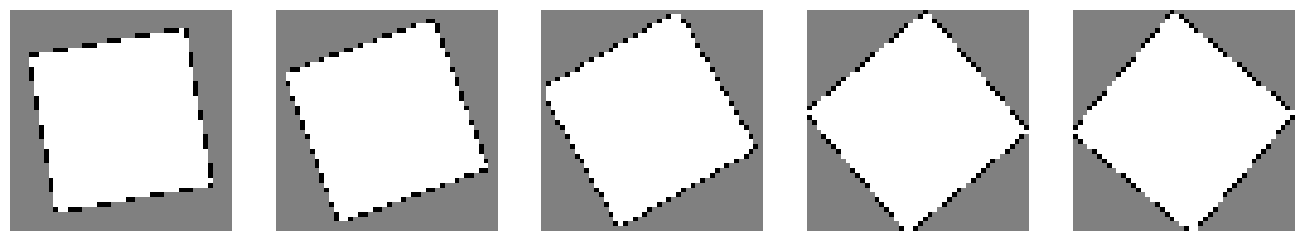

In [7]:
display_samples(empty_dice_filters, is_gray=True)

In [8]:
base_path = '/tf/data/input/dice-faces/dataset-images'
dataset = glob.glob(os.path.join(base_path, '*.jpg'))

In [9]:
data = [plt.imread(image) for image in dataset[:6]]

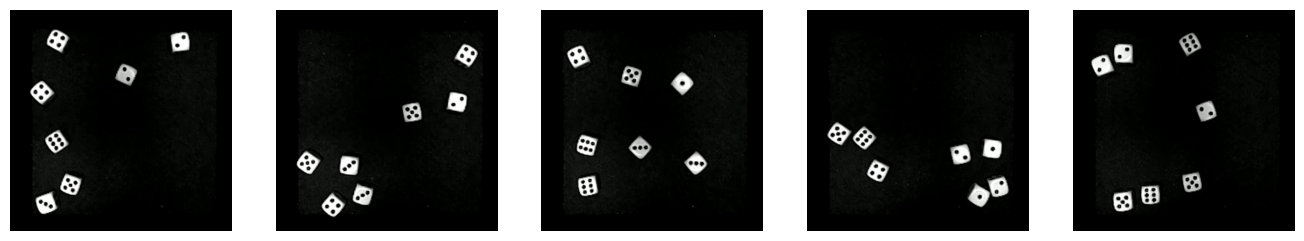

In [10]:
display_samples(data)

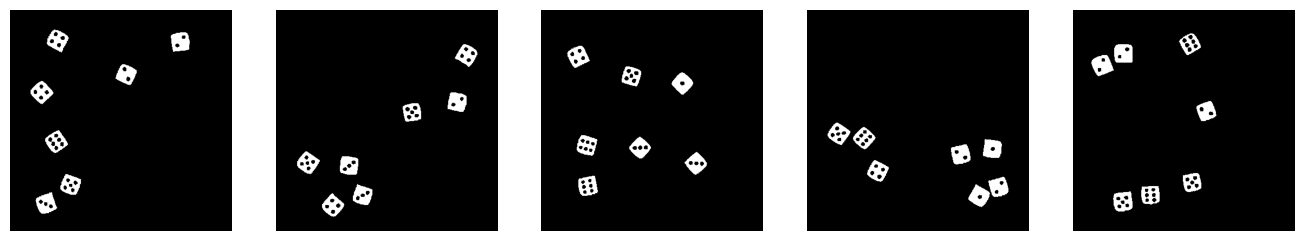

In [11]:
#displaying processed images:
processed_images = [prepare_image_data(image) for image in dataset[:6]]
display_samples(processed_images, is_gray=True)

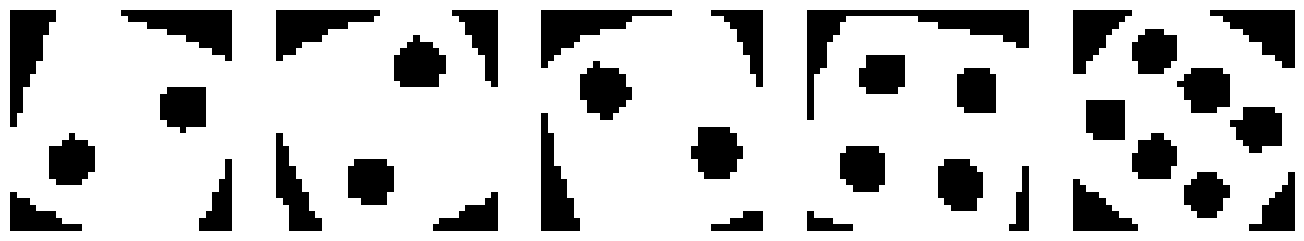

In [12]:

res = get_dice_images(processed_images[0], empty_dice_filters)
display_samples(res, is_gray=True)

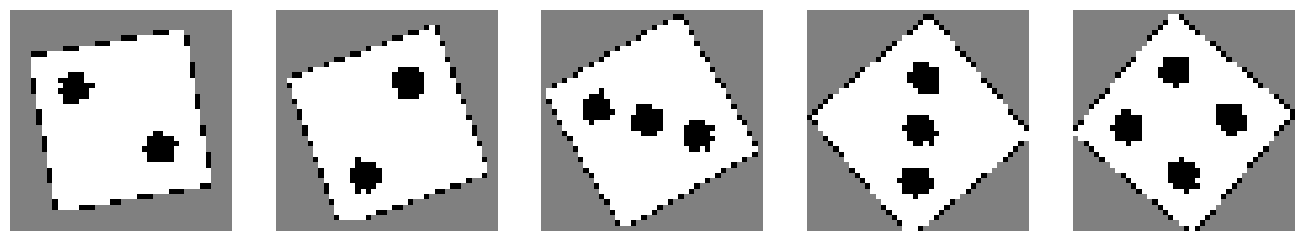

In [21]:
#buidling dice-like kernel filters
dice_kernels, dice_sides = build_dice_kernels()
random_dice_kernels = [dice_kernels[1],dice_kernels[50],dice_kernels[100],dice_kernels[150],dice_kernels[200],dice_kernels[250]]
display_samples(random_dice_kernels, is_gray=True)

In [14]:
data = [plt.imread(image) for image in dataset[:6]]
labels = [process_image(image, dice_kernels, dice_sides, empty_dice_filters) for image in dataset[:6]]

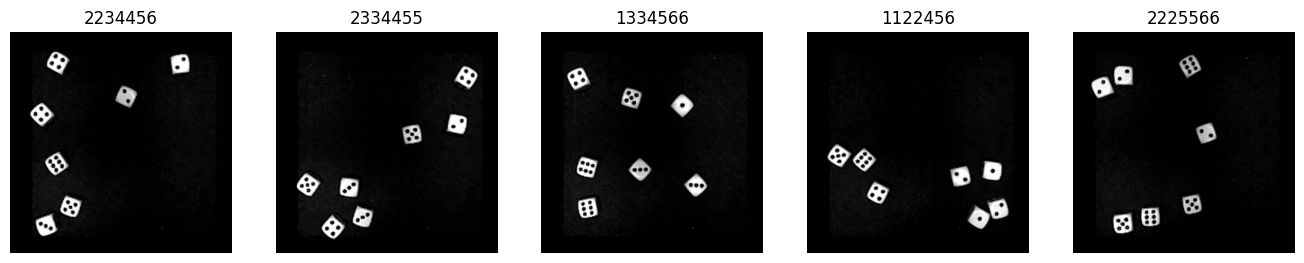

In [19]:
display_samples_with_pred_labels(data, labels)

In [ ]:
def display_samples_with_pred_labels(data, labels):
    fig=plt.figure(figsize=(20, 20))
    for i in range(1, 6):
        fig.add_subplot(1, 6, i)
        plt.imshow(data[i])
        plt.axis('off')
        labels[i]
        plt.title(str(labels[i]))
    plt.show()

In [16]:
data

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [17]:
labels

['1222466', '2234456', '2334455', '1334566', '1122456', '2225566']

In [25]:
kernels = []

In [26]:
for angle in range(0, 90, 10):
    kernels.append(build_kernel(0, size, radius, ofc, border, angle))

NameError: name 'build_kernel' is not defined

In [ ]:
kernels = pad_kernels(kernels)

In [28]:
#hardcoded in build_empty_kernels
size=33
radius=4
ofc=7
border=2

In [29]:
ofc = 7

In [30]:
 img = np.full([size, size], 2, dtype=np.uint8)

In [31]:
img

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

In [ ]:
def build_kernel(side, size, dot_radius, ofc, border, angle):
    
    ofc = 7
    
    img = np.full([size, size], 2, dtype=np.uint8)   
    if side == 1:
        img = draw_dot(img, dot_radius, [0,0])
    elif side == 2:
        img = draw_dot(img, dot_radius, [ofc,ofc])
        img = draw_dot(img, dot_radius, [-ofc,-ofc])
    elif side == 3:
        img = draw_dot(img, dot_radius, [0,0])
        img = draw_dot(img, dot_radius, [ofc,ofc])
        img = draw_dot(img, dot_radius, [-ofc,-ofc])
    elif side == 4:
        img = draw_dot(img, dot_radius, [ofc,ofc])
        img = draw_dot(img, dot_radius, [-ofc,-ofc])
        img = draw_dot(img, dot_radius, [-ofc,ofc])
        img = draw_dot(img, dot_radius, [ofc,-ofc])
    elif side == 5:
        img = draw_dot(img, dot_radius, [ofc,ofc])
        img = draw_dot(img, dot_radius, [-ofc,-ofc])
        img = draw_dot(img, dot_radius, [-ofc,ofc])
        img = draw_dot(img, dot_radius, [ofc,-ofc])
        img = draw_dot(img, dot_radius, [0,0])
    elif side == 6:
        
        off_v = 1
        off_h = 2
        
        img = np.full([size,size],2, dtype=np.uint8)
        img = draw_dot(img, dot_radius, [ofc - off_v,ofc + off_h])
        img = draw_dot(img, dot_radius, [-ofc + off_v,-ofc - off_h])
        img = draw_dot(img, dot_radius, [-ofc + off_v,ofc + off_h])
        img = draw_dot(img, dot_radius, [ofc - off_v,-ofc - off_h])
        img = draw_dot(img, dot_radius, [ofc - off_v,0])
        img = draw_dot(img, dot_radius, [-ofc + off_v,0])
        
    img = rotate_image(img, angle)
    img = np.int8(img)
    
    img[img == 1] = 10
    img[img == 2] = 20
    img[img == 20] = 1
    img[img == 10] = -1
    
    return img

In [34]:
timer = Timer()

TypeError: Timer.__init__() missing 2 required positional arguments: 'function' and 'logger'